In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import random
from normal import Normal

import thinkstats2
import thinkplot

In [2]:
#read data set
df=pd.read_csv('/Users/stephaniemontgomery/DSC-530 DEA/ThinkStats2-master/IMDb movies4.csv')

#replace NAs with 0 in gross income column
df.fillna({'usa_gross_income': 0}, inplace=True)
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,0,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,0,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,0,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,0,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,0,NaN,NaN,12.0,5.0


In [5]:
#clean a handful of USA Gross Income fields in other currency
df['usa2'] = df['usa_gross_income'].astype(str)
na_vals=['EUR 252076','GBP 485300','GBP 438200','GBP 32000','HKD 33397149']
df['usa2'] =df['usa2'].str.strip('$ ')
df.usa2.replace(na_vals, 0, inplace=True)
df.usa2.replace(np.nan, 0, inplace=True)

#create new USA Gross Income field as Int and replace 0s with NaN
df['usa_gross_clean']=df['usa2'].astype(int)
df.usa_gross_clean.replace(0, np.nan, inplace=True)

#create field for USA Gross Income in millions
df['usa_gross_clean_mil']=df.usa_gross_clean/1000000

#create new budget field as float
df["budget2"]= df["budget"].replace('[^\d.]','', regex=True).astype(float)
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,usa2,usa_gross_clean,usa_gross_clean_mil,budget2
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,$ 2250,0,NaN,NaN,7.0,7.0,0,NaN,NaN,2250.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,NaN,0,NaN,NaN,4.0,2.0,0,NaN,NaN,NaN
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,$ 45000,0,NaN,NaN,24.0,3.0,0,NaN,NaN,45000.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,NaN,0,NaN,NaN,28.0,14.0,0,NaN,NaN,NaN
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,NaN,0,NaN,NaN,12.0,5.0,0,NaN,NaN,NaN


Mean:1993.0072102666322
Mode:0    2017
dtype: int64
Variance:575.6296851901183
Std Dev:23.992283867737942

Smallest Values:
1906 1
1911 4
1912 5
1913 13
1914 21
1915 21
1916 33
1917 23
1918 23
1919 47


Largest Values:
2019 1567
2018 2880
2017 3106
2016 3033
2015 2903
2014 2851
2013 2749
2012 2517
2011 2389
2010 2253


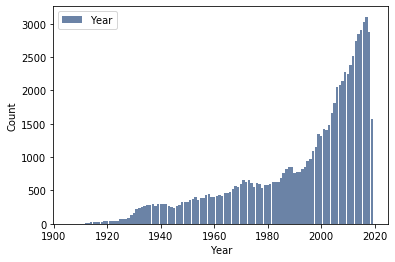

In [18]:
#create histogram of year
hist1 = thinkstats2.Hist(df.year, label='Year')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.year.mean()}\nMode:{df.year.mode()}\nVariance:{df.year.var()}\nStd Dev:{df.year.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist1.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist1.Largest(10):
    print(duration, freq)
    
#plot histogram
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Year', ylabel='Count')

Mean:100.56598132221033
Mode:0    90
dtype: int64
Variance:641.111950304642
Std Dev:25.32018859141144

Smallest Values:
40 1
41 1
42 1
45 53
46 23
47 24
48 31
49 17
50 63
51 25


Largest Values:
3360 1
808 1
729 1
632 1
580 1
540 3
485 1
450 2
442 1
422 1


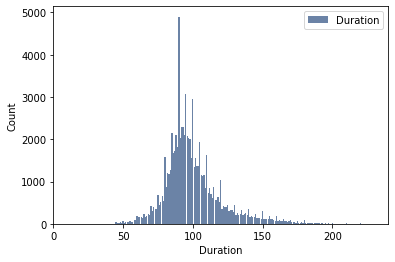

In [19]:
#create histogram of duration
hist2 = thinkstats2.Hist(df.duration, label='Duration')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.duration.mean()}\nMode:{df.duration.mode()}\nVariance:{df.duration.var()}\nStd Dev:{df.duration.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist2.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist2.Largest(10):
    print(duration, freq)
    
#plot histogram    
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Duration', 
                 ylabel='Count',
                 xlim=[0,240]
                )

Mean:5.926586935390402
Mode:0    6.4
dtype: float64
Variance:1.5458328938625177
Std Dev:1.24331528337044

Smallest Values:
1.0 19
1.1 16
1.2 23
1.3 17
1.4 26
1.5 34
1.6 45
1.7 46
1.8 56
1.9 64


Largest Values:
10.0 2
9.8 1
9.7 1
9.6 2
9.5 3
9.4 7
9.3 3
9.2 13
9.1 11
9.0 20


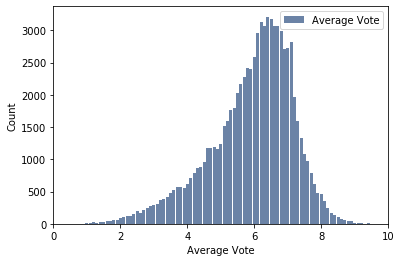

In [20]:
#create histogram of average vote
hist3 = thinkstats2.Hist(df.avg_vote, label='Average Vote')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.avg_vote.mean()}\nMode:{df.avg_vote.mode()}\nVariance:{df.avg_vote.var()}\nStd Dev:{df.avg_vote.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist3.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist3.Largest(10):
    print(duration, freq)
    
#plot histogram
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Average Vote', 
                 ylabel='Count',
                 xlim=[0,10]
                )

Mean:55.76269454488288
Mode:0    57.0
dtype: float64
Variance:315.32714211390356
Std Dev:17.757453142663888

Smallest Values:
1.0 9
3.0 2
4.0 1
5.0 4
6.0 3
7.0 7
8.0 8
9.0 16
10.0 10
11.0 16


Largest Values:
100.0 16
99.0 7
98.0 8
97.0 12
96.0 21
95.0 17
94.0 24
93.0 26
92.0 24
91.0 35


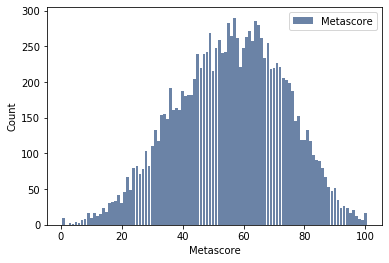

In [24]:
#create histogram of metascore
hist4 = thinkstats2.Hist(df.metascore, label='Metascore')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.metascore.mean()}\nMode:{df.metascore.mode()}\nVariance:{df.metascore.var()}\nStd Dev:{df.metascore.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist4.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist4.Largest(10):
    print(duration, freq)

#plot histogram
thinkplot.Hist(hist4)
thinkplot.Config(xlabel='Metascore', 
                 ylabel='Count')

Mean:95951670.09064199
Mode:0    1000000.0
dtype: float64
Variance:7.452553586528615e+18
Std Dev:2729936553.5720086

Smallest Values:
0.0 26
1.0 5
2.0 4
3.0 1
4.0 1
5.0 3
6.0 1
7.0 1
10.0 2
11.0 1


Largest Values:
350000000000.0 1
120000000000.0 1
80000000000.0 1
70000000000.0 1
59000000000.0 1
50000000000.0 1
35000000000.0 3
30000000000.0 4
22500000000.0 1
20000000000.0 5


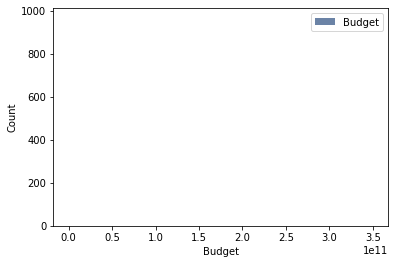

In [26]:
#create histogram of budget
hist5 = thinkstats2.Hist(df.budget2, label='Budget')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.budget2.mean()}\nMode:{df.budget2.mode()}\nVariance:{df.budget2.var()}\nStd Dev:{df.budget2.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist5.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist5.Largest(10):
    print(duration, freq)
    
#plot histogram
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Budget', 
                 ylabel='Count'
                )

Mean:19.621639174034033
Mode:0    1.0
dtype: float64
Variance:2312.55765647752
Std Dev:48.08905963394918

Smallest Values:
3e-05 1
6.4e-05 1
7.2e-05 1
7.4e-05 1
7.8e-05 1
8e-05 1
9.5e-05 1
0.00012 1
0.000147 1
0.00015 1


Largest Values:
936.662225 1
858.373 1
760.507625 1
700.059566 1
678.815482 1
659.363944 1
652.270625 1
623.35791 1
620.181382 1
608.581744 1


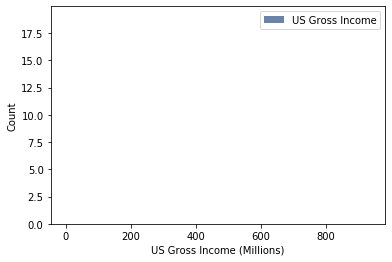

In [32]:
#create histogram of US Gross Income
hist6 = thinkstats2.Hist(df.usa_gross_clean_mil, label='US Gross Income')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.usa_gross_clean_mil.mean()}\nMode:{df.usa_gross_clean_mil.mode()}\nVariance:{df.usa_gross_clean_mil.var()}\nStd Dev:{df.usa_gross_clean_mil.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist6.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist6.Largest(10):
    print(duration, freq)

#plot histogram    
thinkplot.Hist(hist6)
thinkplot.Config(xlabel='US Gross Income (Millions)', 
                 ylabel='Count'
                )

Mean:9421.771006361276
Mode:0    103
dtype: int64
Variance:2725095483.516713
Std Dev:52202.44710276246

Smallest Values:
99 1
100 267
101 258
102 298
103 319
104 300
105 301
106 295
107 291
108 246


Largest Values:
2159628 1
2134569 1
1892929 1
1725365 1
1695085 1
1662528 1
1554261 1
1548863 1
1533574 1
1482143 1


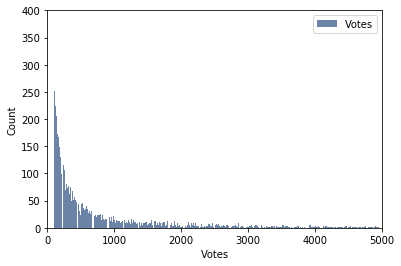

In [30]:
#create histogram of year
hist7 = thinkstats2.Hist(df.votes, label='Votes')

#print mean, mode, variance, and standard deviation
print(f'Mean:{df.votes.mean()}\nMode:{df.votes.mode()}\nVariance:{df.votes.var()}\nStd Dev:{df.votes.std()}\n')

#print 10 smallest and largest values
print('Smallest Values:')
for duration, freq in hist7.Smallest(10):
    print(duration, freq)
print('\n')
print('Largest Values:')
for duration, freq in hist7.Largest(10):
    print(duration, freq)
    
#plot histogram
thinkplot.Hist(hist7)
thinkplot.Config(xlabel='Votes', 
                 ylabel='Count',
                 xlim=[0,5000],
                 ylim=[0,400]
                )

In [43]:
#create data frame of US movies
usa=df[df['country']=='USA']

#create data frame of forgeign movies
foreign=df[df['country']!='USA']

#create pmf of average vote for each data set
foreign_pmf = thinkstats2.Pmf(foreign.avg_vote, label='foreign')
usa_pmf = thinkstats2.Pmf(usa.avg_vote, label='usa')

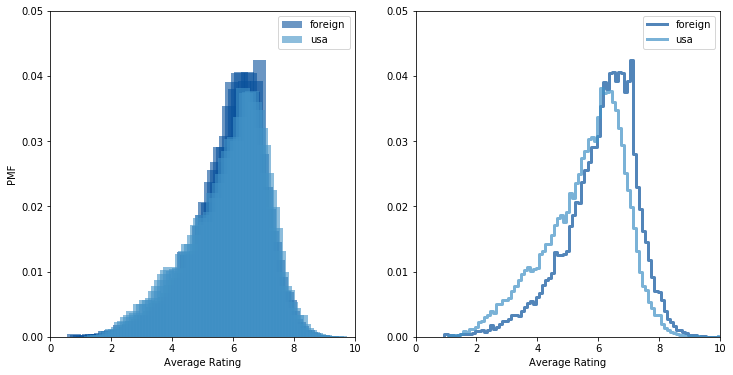

In [45]:
#plot histogram and PMFs
width=0.45
axis = [0, 10, 0, 0.05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(foreign_pmf, align='right', width=width)
thinkplot.Hist(usa_pmf, align='left', width=width)
thinkplot.Config(xlabel='Average Rating', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([foreign_pmf, usa_pmf])
thinkplot.Config(xlabel='Average Rating', axis=axis)

(6.1, 46.470537570903005)

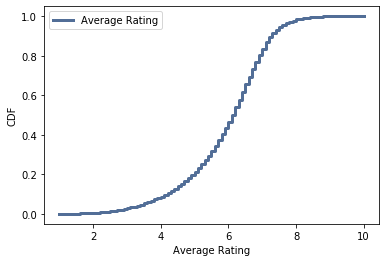

In [34]:
#create CDF of average vote
cdf = thinkstats2.Cdf(df.avg_vote, label='Average Rating')

#plot CDF
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Average Rating', ylabel='CDF', loc='upper left')

#Find median and percentile of 6.0 rating
cdf.Percentile(50), cdf.PercentileRank(6)

Mean, Var 5.941075217516856 1.3433032218656407
Sigma 1.1590095866150723


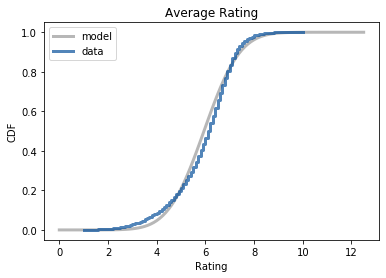

In [47]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(df.avg_vote, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df.avg_vote, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Average Rating',
                 xlabel='Rating',
                 ylabel='CDF')

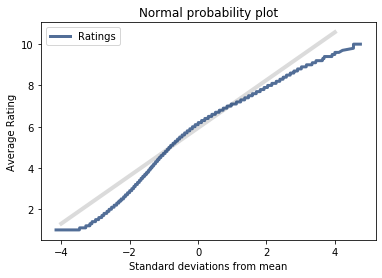

In [35]:
#create normal probabliliy plot of average vote
mean, var = thinkstats2.TrimmedMeanVar(df.avg_vote, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(df.avg_vote)

thinkplot.Plot(xs, ys, label='Ratings')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Average Rating')

In [36]:
#Covariance function
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

#Correlation function
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

#Spearman correlation function
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

Covariance:11.969674087035198
Correlation:0.6922140035574633
Spearman Correlation:0.6853275230071676


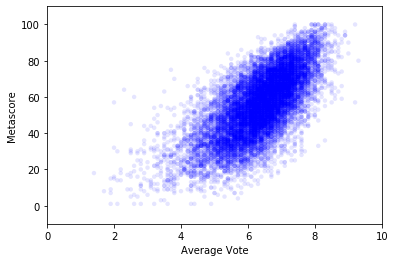

In [37]:
#remove NaN vlues
clean = df.dropna(subset=['avg_vote', 'metascore'])

#calculate and print correlation values
cov=Cov(clean.avg_vote,clean.metascore)
cor=Corr(clean.avg_vote, clean.metascore)
spear=SpearmanCorr(clean.avg_vote, clean.metascore)

print(f"Covariance:{cov}\nCorrelation:{cor}\nSpearman Correlation:{spear}")

#plot scatter
thinkplot.Scatter(df.avg_vote, df.metascore, alpha=0.1, s=20)
thinkplot.Config(xlabel='Average Vote',
                 ylabel='Metascore',
                 axis=[0, 10, -10, 110],
                 legend=False)

Covariance:91.22207049014045
Correlation:0.1501643158211807
Spearman Correlation:0.16345797417505573


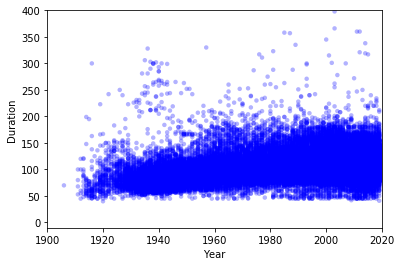

In [96]:
#remove NaN values 
clean = df.dropna(subset=['year', 'duration'])

#calculate and print correlation values
cov=Cov(clean.year,clean.duration)
cor=Corr(clean.year, clean.duration)
spear=SpearmanCorr(clean.year, clean.duration)

print(f"Covariance:{cov}\nCorrelation:{cor}\nSpearman Correlation:{spear}")

#plot scatter
thinkplot.Scatter(df.year, df.duration, alpha=0.3, s=20)
thinkplot.Config(xlabel='Year',
                 ylabel='Duration',
                 axis=[1900, 2020, -10, 400],
                 legend=False)

Covariance:10698.539117658444
Correlation:0.16483813356750815
Spearman Correlation:0.27922677895722087


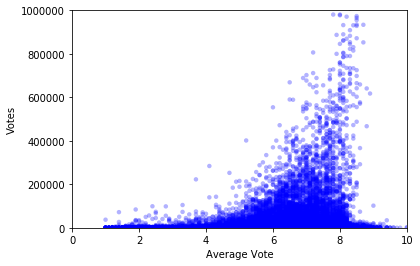

In [38]:
#remove NaN values
clean = df.dropna(subset=['avg_vote', 'votes'])

#calculate and print correlation values
cov=Cov(clean.avg_vote,clean.votes)
cor=Corr(clean.avg_vote, clean.votes)
spear=SpearmanCorr(clean.avg_vote, clean.votes)

print(f"Covariance:{cov}\nCorrelation:{cor}\nSpearman Correlation:{spear}")

#plot scatter
thinkplot.Scatter(df.avg_vote, df.votes, alpha=0.3, s=20)
thinkplot.Config(xlabel='Average Vote',
                 ylabel='Votes',
                 axis=[0, 10, 0, 1000000],
                 legend=False)

Covariance:0.6270949054767229
Correlation:0.28585441203715645
Spearman Correlation:0.27922677895722087


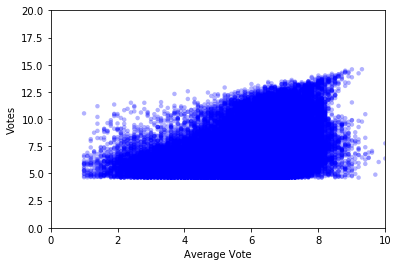

In [104]:
clean = df.dropna(subset=['avg_vote', 'votes'])
cov=Cov(clean.avg_vote,np.log(clean.votes))
cor=Corr(clean.avg_vote, np.log(clean.votes))
spear=SpearmanCorr(clean.avg_vote, np.log(clean.votes))

print(f"Covariance:{cov}\nCorrelation:{cor}\nSpearman Correlation:{spear}")

thinkplot.Scatter(df.avg_vote, np.log(df.votes), alpha=0.3, s=20)
thinkplot.Config(xlabel='Average Vote',
                 ylabel='log(Votes)',
                 axis=[0, 10, 0, 20],
                 legend=False)

Covariance:7.9506974875088545
Correlation:0.16225643075074364
Spearman Correlation:0.12716016026615393


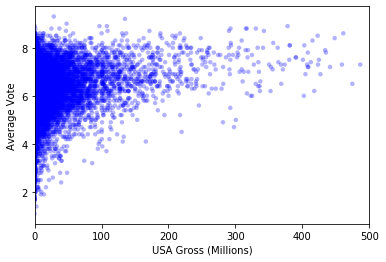

In [158]:
clean = df.dropna(subset=['avg_vote', 'usa_gross_clean_mil'])
cov=Cov(clean.avg_vote,clean.usa_gross_clean_mil)
cor=Corr(clean.avg_vote, clean.usa_gross_clean_mil)
spear=SpearmanCorr(clean.avg_vote, clean.usa_gross_clean_mil)

print(f"Covariance:{cov}\nCorrelation:{cor}\nSpearman Correlation:{spear}")

thinkplot.Scatter(df.usa_gross_clean_mil,df.avg_vote, alpha=0.3, s=20)
thinkplot.Config(xlabel='USA Gross (Millions)',
                 ylabel='Average Vote',
                 xlim=[0,500],
                 legend=False)

In [39]:
#Correlation Hypothesis Test function
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [40]:
#drop NaN values
clean = df.dropna(subset=['avg_vote', 'metascore'])

#calculate correlation p-value
data = clean.avg_vote.values, clean.metascore.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [49]:
#drop NaN values
clean = df.dropna(subset=['avg_vote', 'usa_gross_clean_mil'])

#calculate correlation p-value
data = clean.avg_vote.values, clean.usa_gross_clean_mil.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [45]:
#Difference of means Hypothesis Test function
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [46]:
#calculate means of US and foreign films
usa_mean=usa.avg_vote.mean()
foreign_mean=foreign.avg_vote.mean()

#delta
diff=usa_mean-foreign_mean

#calculate p-value
data = usa.avg_vote.values, foreign.avg_vote.values    
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(f"US mean:{usa_mean}\nForeign mean:{foreign_mean}\nDelta:{diff}\np-value:{pvalue}")

US mean:5.5887195343761595
Foreign mean:6.099280441775297
Delta:-0.5105609073991371
p-value:0.0


In [47]:
#linear regression of average vote predicted by US gross income (millions)
formula = 'avg_vote ~ usa_gross_clean_mil'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avg_vote   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     407.9
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.57e-89
Time:                        15:24:50   Log-Likelihood:                -21493.
No. Observations:               15089   AIC:                         4.299e+04
Df Residuals:                   15087   BIC:                         4.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.2281      0.009    704.434      0.000       6.211       6.245
usa_gross_clean_mil     0.0034      0.000     20.197      0.000       0.003       0.004
==============================================================================
Omnibus:                     1510.976   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2284.390
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                       4.159   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#linear regression of US gross income (millions) predicted by average vote
formula = 'usa_gross_clean_mil ~ avg_vote'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     usa_gross_clean_mil   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     407.9
Date:                 Sat, 08 Aug 2020   Prob (F-statistic):           1.57e-89
Time:                         15:27:07   Log-Likelihood:                -79649.
No. Observations:                15089   AIC:                         1.593e+05
Df Residuals:                    15087   BIC:                         1.593e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.5843      2.418    -11.822      0.000     -33.323     -23.845
avg_vote       7.6571      0.379     20.197      0.000       6.914       8.400
==============================================================================
Omnibus:                    16620.864   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1754168.323
Skew:                           5.602   Prob(JB):                         0.00
Kurtosis:                      54.620   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#create field for votes in thousands
df['votes_thou'] = df['votes']/1000

#multiple linear regression of US gross income (millions) predicted by average vote, votes, year, and duration
formula = 'usa_gross_clean_mil ~  avg_vote+ votes_thou + year + duration'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     usa_gross_clean_mil   R-squared:                       0.454
Model:                             OLS   Adj. R-squared:                  0.454
Method:                  Least Squares   F-statistic:                     3140.
Date:                 Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                         15:27:11   Log-Likelihood:                -75281.
No. Observations:                15089   AIC:                         1.506e+05
Df Residuals:                    15084   BIC:                         1.506e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8246     38.455     -0.672      0.502    -101.201      49.552
avg_vote      -3.0047      0.312     -9.638      0.000      -3.616      -2.394
votes_thou     0.2887      0.003    106.304      0.000       0.283       0.294
year           0.0222      0.019      1.162      0.245      -0.015       0.060
duration       0.0678      0.014      4.767      0.000       0.040       0.096
==============================================================================
Omnibus:                    13214.587   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2627203.151
Skew:                           3.509   Prob(JB):                         0.00
Kurtosis:                      67.261   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
df['votes_thou'] = df['votes']/1000

#multiple linear regression of US gross income (millions) predicted by average vote, votes, and duration
formula = 'usa_gross_clean_mil ~ avg_vote+ votes_thou + duration'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     usa_gross_clean_mil   R-squared:                       0.437
Model:                             OLS   Adj. R-squared:                  0.437
Method:                  Least Squares   F-statistic:                     1933.
Date:                 Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                         15:35:46   Log-Likelihood:                -51611.
No. Observations:                 9967   AIC:                         1.032e+05
Df Residuals:                     9962   BIC:                         1.033e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7991      3.592      8.574      0.000      23.757      37.841
avg_vote      -5.2980      0.692     -7.661      0.000      -6.654      -3.942
votes_thou     0.2842      0.003     82.268      0.000       0.277       0.291
duration       0.1600      0.022      7.206      0.000       0.116       0.204
metascore     -0.0745      0.034     -2.162      0.031      -0.142      -0.007
==============================================================================
Omnibus:                     7738.767   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           822664.824
Skew:                           3.027   Prob(JB):                         0.00
Kurtosis:                      47.094   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
df['votes_thou'] = df['votes']/1000

#multiple linear regression of average vote predicted by US gross income (millions), votes, and duration
formula = 'avg_vote ~ usa_gross_clean_mil + votes_thou + duration'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avg_vote   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:32:35   Log-Likelihood:                -20436.
No. Observations:               15089   AIC:                         4.088e+04
Df Residuals:                   15085   BIC:                         4.091e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0841      0.039    130.702      0.000       5.008       5.160
usa_gross_clean_mil    -0.0021      0.000     -9.964      0.000      -0.003      -0.002
votes_thou              0.0030   9.12e-05     33.260      0.000       0.003       0.003
duration                0.0106      0.000     28.938      0.000       0.010       0.011
==============================================================================
Omnibus:                     2349.975   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4508.589
Skew:                          -0.972   Prob(JB):                         0.00
Kurtosis:                       4.842   Cond. No.                         725.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""